In [77]:
import torch as tc
from torch import nn
device = "cuda" if tc.cuda.is_available() else "cpu"
print(f"current device is {device} \n")


import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
data_count = 2000
x,y = make_circles(
    data_count,
    noise=0.08)

import pandas as pd
circles = pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"label":y})
circles.head(10)




current device is cuda 



,X1,X2,label
0,1.027156,0.310021,0
1,0.754920,-0.197565,1
2,-0.465816,0.394183,1
3,-0.279969,-1.140030,0
4,-0.774389,-0.194548,1
5,0.363420,-0.644005,1
6,-0.365902,0.732706,1
7,1.042087,-0.173635,0
8,-0.008963,0.823022,1
9,0.341553,0.851805,0


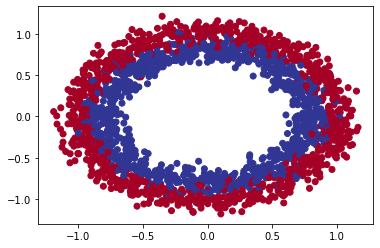

In [78]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

In [79]:
x = tc.from_numpy(x).type(tc.float)
y = tc.from_numpy(y).type(tc.float)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)
len(x_train),len(x_test),len(y_train),len(y_test)

(1400, 600, 1400, 600)

In [80]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=32)
    self.layer_2 = nn.Linear(in_features=32,out_features=32)
    self.layer_3 = nn.Linear(in_features=32,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model = Model().to(device)
print(model)

Model(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [96]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = tc.optim.SGD(model.parameters(),lr=0.05)

accuracy_function = lambda y_result,y_pred : (tc.eq(y_result,y_pred).sum().item()/len(y_pred))*100

In [97]:
epochs = 20_000

x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs+1):

  y_result = model(x_train).squeeze()
  y_pred = tc.round(tc.sigmoid(y_result))


  loss = loss_function(y_result , y_train)
  accuracy = accuracy_function(y_train,y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with tc.inference_mode():
    test_result = model(x_test).squeeze()
    test_pred = tc.round(tc.sigmoid(test_result))
    test_loss = loss_function(test_result,y_test)
    test_accuracy = accuracy_function(y_test,test_pred)

  if epoch % 100 == 0:
    print(f"epoch:{epoch} loss:{loss:.5f} accuracy:%{accuracy:.5f} test loss:{test_loss:.5f} test accuracy:%{test_accuracy:.2f}\n")


epoch:0 loss:0.24925 accuracy:%89.00000 test loss:0.25768 test accuracy:%89.50

epoch:100 loss:0.24824 accuracy:%88.85714 test loss:0.25780 test accuracy:%89.50

epoch:200 loss:0.24823 accuracy:%88.92857 test loss:0.25785 test accuracy:%89.67

epoch:300 loss:0.24823 accuracy:%88.85714 test loss:0.25785 test accuracy:%89.50

epoch:400 loss:0.24822 accuracy:%88.92857 test loss:0.25786 test accuracy:%89.83

epoch:500 loss:0.24822 accuracy:%88.92857 test loss:0.25784 test accuracy:%89.83

epoch:600 loss:0.24821 accuracy:%88.85714 test loss:0.25781 test accuracy:%89.50

epoch:700 loss:0.24821 accuracy:%88.85714 test loss:0.25782 test accuracy:%89.50

epoch:800 loss:0.24820 accuracy:%88.85714 test loss:0.25780 test accuracy:%89.50

epoch:900 loss:0.24820 accuracy:%88.92857 test loss:0.25781 test accuracy:%89.83

epoch:1000 loss:0.24819 accuracy:%88.85714 test loss:0.25779 test accuracy:%89.50

epoch:1100 loss:0.24819 accuracy:%88.85714 test loss:0.25779 test accuracy:%89.50

epoch:1200 loss: